HW2: Linear Regressions with Multiple Parameters
Used sklearn for regression [note: statsmodels was not compatible with the version of scipy I was using at the time so I switched over to Matlab for the linear regression tables with coefficient and p-values]. 


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline


In [24]:
data = pd.read_csv("HW2.csv", names = ["x1", "x2", "y"])
data.head()

,x1,x2,y
0,32.5890,6.4873,4.1549
1,36.2320,31.7710,1.0401
2,5.0795,12.4490,1.3170
3,36.5350,21.1410,2.3423
4,25.2940,6.6259,1.5134


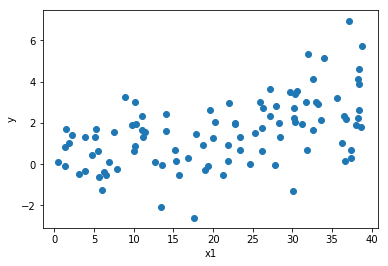

In [25]:
plt.scatter(data["x1"], data["y"])
plt.xlabel("x1")
plt.ylabel("y")

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#fitting a linear Regression
linear = LinearRegression()
x1_values = data[["x1"]]
x2_values = data[["x2"]]
x_values = data[["x1", "x2"]]
y_values = data[["y"]]


In [28]:
linear.fit(x1_values,y_values)
y_hat = linear.predict(x1_values)

In [29]:
#preparations for the linear fit
max_x, min_x = max(data["x1"]), min(data["x1"])
max_y, min_y = max(y_hat)[0], min(y_hat)[0]
max_x, min_x, max_y, min_y

(38.824, 0.47608, 2.818956087761787, 0.09421895162215141)

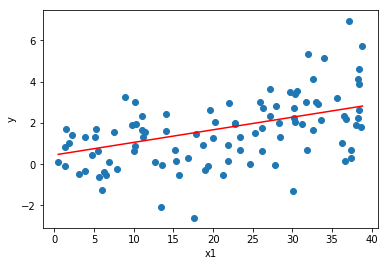

In [30]:
plt.scatter(data["x1"], data["y"])
plt.plot([min_x, max_x], [min_x, max_y], color = "r")
plt.xlabel("x1")
plt.ylabel('y')

In [31]:
import scipy as sp
regression_value = sp.stats.linregress(data[["x1", "y"]])
print("the slope is " + str(regression_value[0]) +" and the intercept is " \
      + str(regression_value[1]))

the slope is 0.0710530619689317 and the intercept is 0.06039200987998283


In [32]:
se =sp.stats.linregress(data[["x1", "y"]])[4]
se
slope = sp.stats.linregress(data[["x1", "y"]])[0]
print("the standard error and slope:")
se, slope

the standard error and slope:


(0.012028142821562768, 0.0710530619689317)

In [33]:
print("The 95% confidence interval is: " + str((slope - 2*se)) +", "\
      + str((slope + 2*se)))

The 95% confidence interval is: 0.046996776325806164, 0.09510934761205724


In [34]:
linear= LinearRegression()
linear.fit(x_values, y_values)
yhat_multi = linear.predict(x_values)

In [35]:
#in matlab the coefficient values were calculated before for the mulitple linear regression line
x1 = x1_values.values
x2 = x2_values.values
Y_hat_multi = 1.8659 + .057066*x1 -0.080764*x2


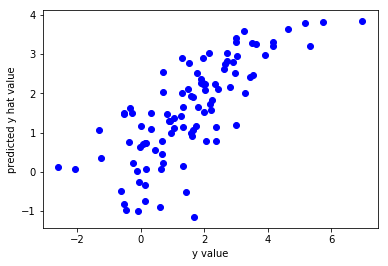

In [36]:
#the yhat values were calculated before for the linear regression line
plt.scatter(y_values, Y_hat_multi, color = "b")
plt.xlabel("y value")
plt.ylabel("predicted y hat value")

In [37]:
#categorizing the worktypes based on hours spent studying
def WorkType(x):
    if (x < 10).all():
        return "Idle"
    elif (x < 30).all():
        return "Diligent"
    else: 
        return "Workaholic"

In [38]:
work_type = x1_values.apply(WorkType, axis = 1)
#x1_values
data["WorkType"] = work_type
data.head()

,x1,x2,y,WorkType
0,32.5890,6.4873,4.1549,Workaholic
1,36.2320,31.7710,1.0401,Workaholic
2,5.0795,12.4490,1.3170,Idle
3,36.5350,21.1410,2.3423,Workaholic
4,25.2940,6.6259,1.5134,Diligent


In [39]:
#get the dummy variables needed for parameterization of the categorical variables
data["diligent"] = pd.get_dummies(data["WorkType"])["Diligent"]
data["Idle"] = pd.get_dummies(data["WorkType"])["Idle"]
data["workaholic"] = pd.get_dummies(data["WorkType"])["Workaholic"]
#data[["diligent"]]

In [40]:
"""I dropped the Idle category since 2 dummy variables needed for 3 possible states (otherwise too many parameters
 as some is accounted for in the intercept). Idle is used as the baseline"""
data= data.drop("Idle", axis =1)
data = data.drop("WorkType", axis = 1)
data.head()

,x1,x2,y,diligent,workaholic
0,32.5890,6.4873,4.1549,0,1
1,36.2320,31.7710,1.0401,0,1
2,5.0795,12.4490,1.3170,0,0
3,36.5350,21.1410,2.3423,0,1
4,25.2940,6.6259,1.5134,1,0


In [41]:
#exported the data to Matlab to analyze and get a linear regression table 
data.to_csv("HW2_encoded.csv", header = None)